In [84]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# linear regression

In [85]:
# 0) Prepare data
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)


In [86]:
# cast to float Tensor
X = torch.from_numpy(X_numpy.astype(np.float32)) # from numpy to tensor
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0], 1)

n_samples, n_features = X.shape


In [87]:
# 1) Model
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size) # Linear model f = wx + b

In [88]:
# 2) Loss and optimizer
learning_rate = 0.01

_loss = nn.MSELoss() # (y_pred-y)**2
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

In [89]:
# 3) Training loop
num_epochs = 100
for epoch in range(num_epochs):
    # Forward pass and loss
    y_predicted = model(X)
    loss = _loss(y_predicted, y)
    
    # Backward pass and update
    loss.backward()
    optimizer.step()

    # zero grad before new step
    optimizer.zero_grad()

    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

epoch: 10, loss = 4107.3730
epoch: 20, loss = 2893.9050
epoch: 30, loss = 2066.5471
epoch: 40, loss = 1502.3260
epoch: 50, loss = 1117.4727
epoch: 60, loss = 854.9135
epoch: 70, loss = 675.7515
epoch: 80, loss = 553.4739
epoch: 90, loss = 470.0039
epoch: 100, loss = 413.0147


(100, 1) (100,)


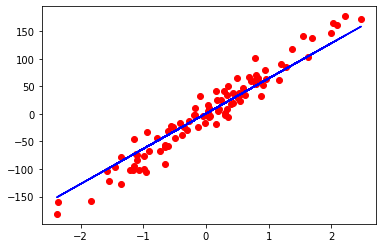

In [90]:
# Plot
predicted = model(X).detach().numpy()
print(X_numpy.shape,y_numpy.shape)
plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()

# logistic regression

In [94]:
# 0) Prepare data
bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target

n_samples, n_features = X.shape

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)


In [112]:
print(X_train.shape,y_train.shape)


(455, 30) (455,)


In [113]:
# scale the data 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train

array([[-0.36180827, -0.26521011, -0.31715702, ..., -0.07967528,
        -0.52798733,  0.2506337 ],
       [-0.8632675 ,  0.71560604, -0.85646012, ..., -0.76980239,
         0.44312729, -0.20987332],
       [-0.4334453 ,  0.32513895, -0.41286667, ..., -0.06601541,
        -1.1169427 ,  0.0329492 ],
       ...,
       [-0.479293  , -0.17689018, -0.45697634, ..., -0.20261414,
         0.18670009,  0.17414996],
       [ 1.16835876, -0.15364809,  1.17466524, ...,  0.26789258,
         0.19828067, -0.23394164],
       [-0.40765597, -1.29715887, -0.42826344, ..., -0.78042674,
        -0.88036793, -0.80355834]])

In [114]:
# cast and reshape the data
X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

y_train = y_train.view(y_train.shape[0], 1)
y_test = y_test.view(y_test.shape[0], 1)

In [115]:
# 1) Model
# Linear model f = wx + b , sigmoid at the end
class Model(nn.Module):
    def __init__(self, n_input_features):
        super(Model, self).__init__()
        self.linear = nn.Linear(n_input_features, 1)

    def forward(self, x):
        y_pred = torch.sigmoid(self.linear(x))
        return y_pred

model = Model(n_features)

In [116]:
# 2) Loss and optimizer
num_epochs = 100
learning_rate = 0.01
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [117]:
# 3) Training loop
for epoch in range(num_epochs):
    # Forward pass and loss
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)

    # Backward pass and update
    loss.backward()
    optimizer.step()

    # zero grad before new step
    optimizer.zero_grad()

    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')


with torch.no_grad():
    y_predicted = model(X_test)
    y_predicted_cls = y_predicted.round()
    acc = y_predicted_cls.eq(y_test).sum() / float(y_test.shape[0])
    print(f'accuracy: {acc.item():.4f}')


epoch: 10, loss = 0.6253
epoch: 20, loss = 0.5003
epoch: 30, loss = 0.4252
epoch: 40, loss = 0.3753
epoch: 50, loss = 0.3395
epoch: 60, loss = 0.3123
epoch: 70, loss = 0.2907
epoch: 80, loss = 0.2732
epoch: 90, loss = 0.2585
epoch: 100, loss = 0.2460
accuracy: 0.8947
